In [4]:
from IPython.display import IFrame
IFrame("pdf/TP5 2021 R4052_01.pdf", width=900, height=500)

# Ejercicio 1

A) Definir un valor para la frecuencia de muestreo (𝑓 ) del ADC, justificando su respuesta.

Suponiendo que podemos atenuar la fuente por debajo del nivel de ruido en 10KHz podemos elegir una frecuencia de muestreo de 20KHz, evitando así el aliasing. Esto es debido a que nuestra frecuencia de Nyquist sería igual a 10KHz y eligiendo un adc de 20KHz estaríamos cumpliendo la condición mínima del teorema.

B) Diseñar un filtro analógico pasa bajo anti alias, esto es, que atenúe las componentes
frecuenciales ubicadas por encima de la frecuencia de Nyquist, para evitar efecto alias.
Explicar el criterio utilizado para fijar la atenuación en la banda detenida.

Necesitamos un filtro pasa-bajos que tenga 40dBV de atenuación en 10KHz. Para simplificar podemos elegir un filtro de segundo órden el cual tenga 3dB de atenuación en 1KHz(corte) y una atenuación de 40dB en 10KHz.

Para esto asumimos que las frecuencias de interés están en baja y media frecuencia(debajo de 1KHz) y las frecuencias de más de 1KHz son de interés secundario.

![imagen](img/LT_filtro.jpg)

![imagen](img/LT_Circuito.jpg)

C) Repetir el punto b), pero eligiendo una 𝑓 diez veces más grande a la elegida en 

Si elegimos una frecuencia de muestreo diéz veces más grande podemos decír que la frecuencia máxima que puede dejar pasar el filtro es de 100KHz. En el gráfico no tenemos datos de como es la señal en este punto, pero podemos asumir siendo muy pesimistas que necesitamos una atenuación de 20dB. Podríamos poner como frecuencia de corte 10KHz y frecuencia de stop en 100KHz. Esto se logra con un filtro de primer órden que puede ser pasivo.

![imagen](img/LT_filtro2.jpg)

![imagen](img/LT_Circuito2.jpg)

a) Comparar ambos filtros anti alias y evaluar las ventajas/desventajas de esta modificación.

Los dos son del tipo Butterworth, por lo que tienen características parecidas. El segundo nos permite la posibilidad de mantener alta fidelidad en la señal(podemos poner una frecuencia de corte mucho más grande), a su vez la distorsión de fase del primer filtro es múcho mas grande debido a que en un filtro del tipo Butterworth tenemos mucha alinealidad en la fase en las cercanías de la frecuencia de corte.

![imagen](img/LT_filtro_GrpDelay.jpg)

**Gráfico del retardo de grupo para el filtro con frecuencia de corte en 1KHz**

---

D) Repetir el punto b), pero considerando que se requiere una fase aprox. lineal hasta 10 kHz.

Para esto necesitamos implementar un filtro de Bessel que tenga frecuencia de corte en 10Khz. Para no ser tan pesimistas proponemos un filtro que tenga su frecuencia de stop en 100KHz con una atenuación de 20dB. Esto nos permite calcular el filtro bessel, quedando la siguiente configuración:

**Ganancia:**

![imagen](img/LT_filtro_Bessel.jpg)

**Fase:**

![imagen](img/LT_filtro_Bessel_Fase.jpg)

**Cicruito:**

![imagen](img/LT_Circuito_Bessel.jpg)


# Ejercicio 2

<img src="./img/consigna_2.png" align="left"  />

In [10]:
IFrame("./pdf/Analisis_FiltroDigitalLP.pdf", width=900, height=1000)

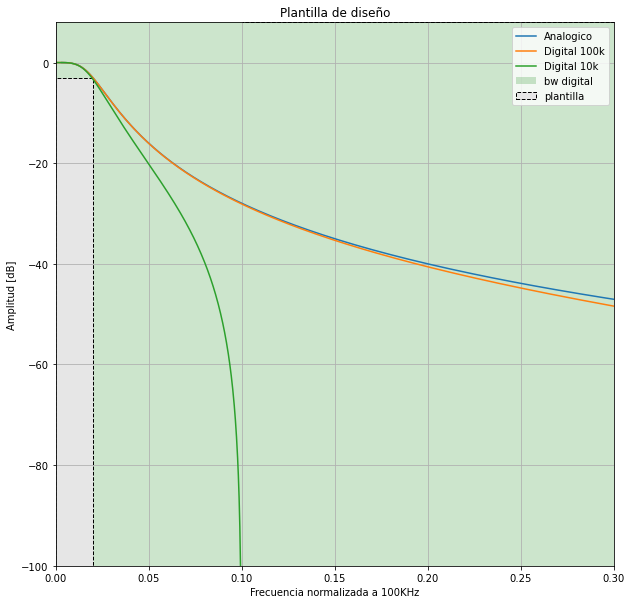

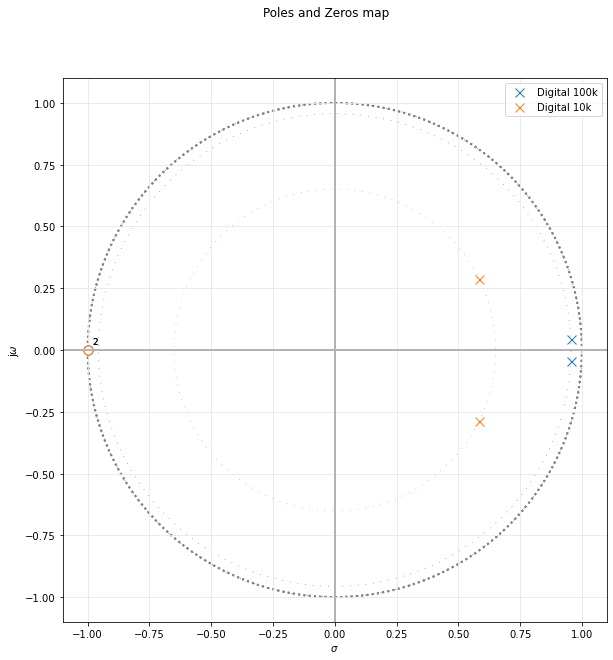

In [17]:
# Agrego basado en los ejemplos vistos: iir_bilinear_design.py

import splane as s
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

m.rcParams['figure.figsize'] = (10,10)

fo = 1e3
wo =  2*np.pi*fo
fs = 100e3
fs_2 = 10e3

fpas = fo/(fs/2)  
fstop = 5e3/(fs/2)  

num_hp, den_hp = sig.butter(2, wo, btype='lowpass',analog=True,output='ba')
my_analog_filter = sig.TransferFunction(num_hp,den_hp)

numz, denz = sig.bilinear(num_hp, den_hp, fs)
my_digital_filter = sig.TransferFunction(numz, denz, dt=1/fs)

numz, denz = sig.bilinear(num_hp, den_hp, fs_2)
my_digital_filter_2 = sig.TransferFunction(numz, denz, dt=1/fs_2)

plt.figure(1)
plt.cla()

npoints = 500
w_nyq = 2*np.pi*fs/2

w, mag, _ = my_analog_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label="Analogico")

w, mag, _ = my_digital_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label="Digital 100k")

w, mag, _ = my_digital_filter_2.bode(npoints)
plt.plot(w/w_nyq, mag, label="Digital 10k")


plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a 100KHz')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 0.3])

s.plot_plantilla(filter_type="lowpass" , fpass=fpas, ripple=3 , fstop=fstop, attenuation=-10, fs=fs)

digital_fig_id, _ = s.pzmap(my_digital_filter, filter_description="Digital 100k", fig_id = 2)
digital_fig_id, _ = s.pzmap(my_digital_filter_2, filter_description="Digital 10k", fig_id = 2)

C:\Users\marti\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))
C:\Users\marti\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


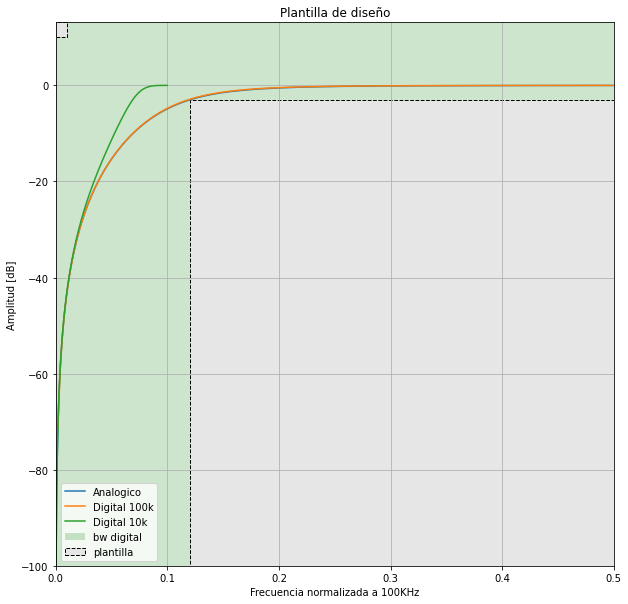

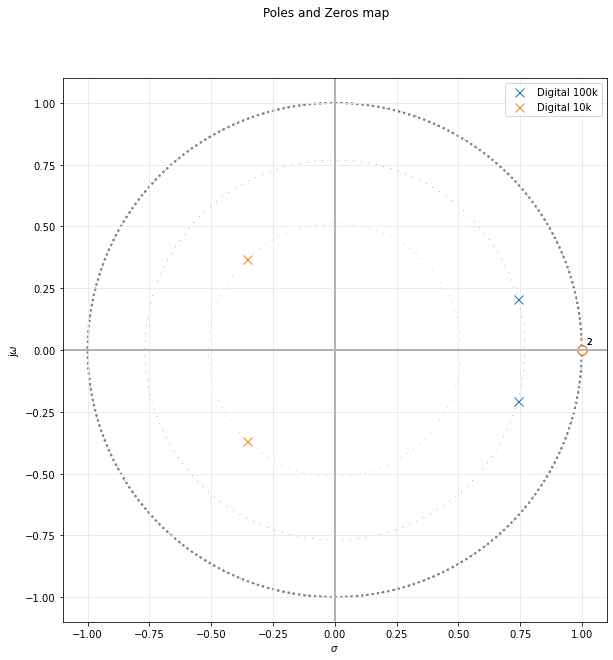

In [18]:
# Filtro pasaaltos 6k

import matplotlib as m

m.rcParams['figure.figsize'] = (10,10)

fo = 6e3
wo =  2*np.pi*fo
fs = 100e3
fs_2 = 10e3

fpas = fo/(fs/2)  
fstop = 500/(fs/2)  

num_hp, den_hp = sig.butter(2, wo, btype='highpass',analog=True,output='ba')
my_analog_filter = sig.TransferFunction(num_hp,den_hp)

numz, denz = sig.bilinear(num_hp, den_hp, fs)
my_digital_filter = sig.TransferFunction(numz, denz, dt=1/fs)

numz, denz = sig.bilinear(num_hp, den_hp, fs_2)
my_digital_filter_2 = sig.TransferFunction(numz, denz, dt=1/fs_2)

plt.figure(1)
plt.cla()

npoints = 500
w_nyq = 2*np.pi*fs/2

w, mag, _ = my_analog_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label="Analogico")

w, mag, _ = my_digital_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label="Digital 100k")

w, mag, _ = my_digital_filter_2.bode(npoints)
plt.plot(w/w_nyq, mag, label="Digital 10k")


plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a 100KHz')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 0.5])

s.plot_plantilla(filter_type="highpass" , fpass=fpas, ripple=3 , fstop=fstop, attenuation=-10, fs=fs)

digital_fig_id, _ = s.pzmap(my_digital_filter, filter_description="Digital 100k", fig_id = 2)
digital_fig_id, _ = s.pzmap(my_digital_filter_2, filter_description="Digital 10k", fig_id = 2)

# Ejercicio 3

Dadas las siguientes respuestas al impulso se pide:

- Transferencia del sistema H(z)
- Singularidades en el plano z
- Respuesta de módulo y fase

#### Filtro de media móvil 

- $ h_1(k)=(1,1) $ significa $ h(0)=1 $ y $ h(1)=1 $
- $ h_2(k)=(1,1,1) $

1- ¿Qué modificación debería implementarse para que la salida representa la media aritmética?

2- Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

#### Filtro diferenciador 

- $ h_1(k)=(1,-1) $ de primer orden 
- $ h_2(k)=(1,0,-1) $ de segundo orden

1- ¿Qué demora introducen ambos sistemas?

2- Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a  su respuesta ideal $\lvert H(\Omega)\rvert = \Omega$


### Filtro de media móvil

##### Transferencia del primer sistema

$$ H(z)=1+z^{-1}=\frac{z+1}{z} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

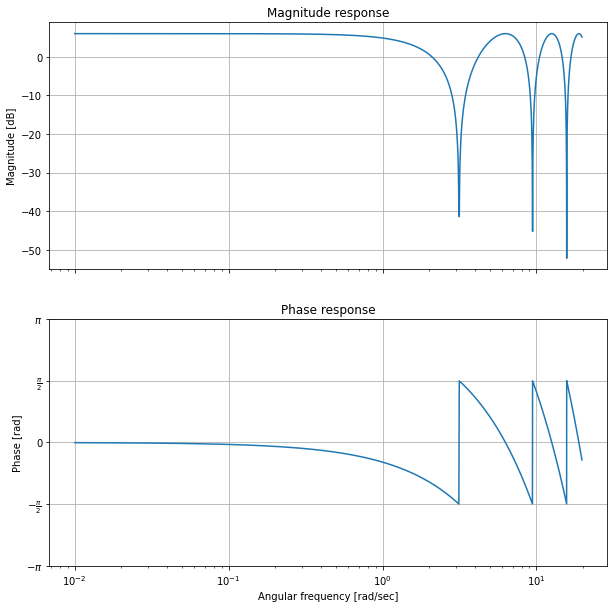

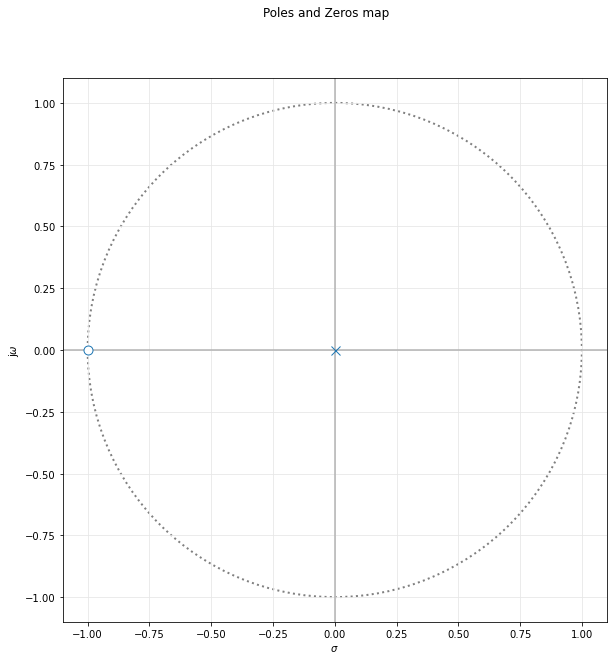

In [19]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 1]
den_z = [1, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

Para que la salida represente la media aritmética, la salida debería dividirse por la cantidad de muestras promediadas, en este caso 2.

##### Transferencia del segundo sistema

$$ H(z)=1+z^{-1}+z^{-2}=\frac{z^2+z+1}{z^2} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

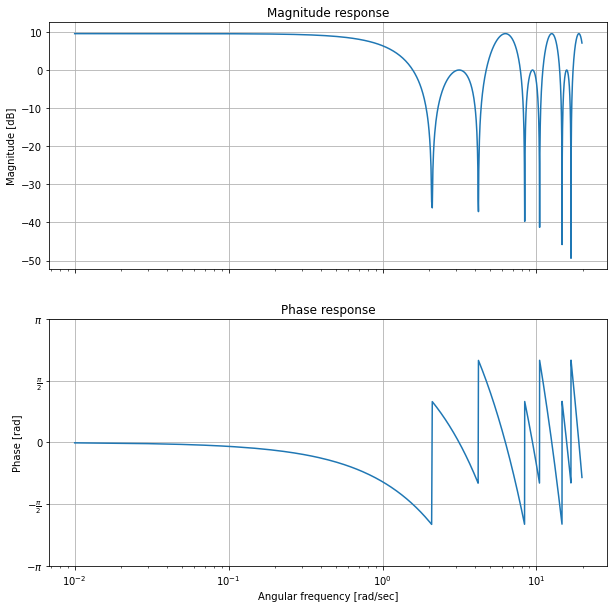

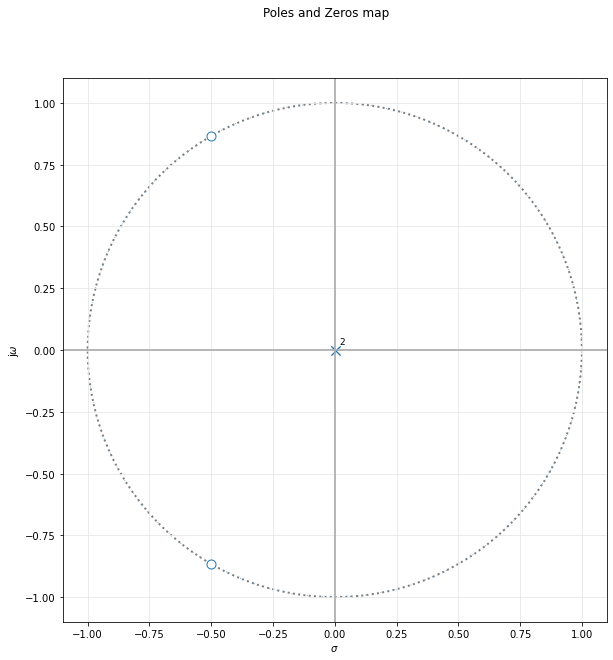

In [20]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 1, 1]
den_z = [1, 0, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

Para que la salida represente la media aritmética, la salida debería dividirse por la cantidad de muestras promediadas, en este caso 3.
Si quisiera eliminar los 50Hz, debería colocar el cero de la transferencia a esta frecuencia, por lo tanto:
$$ w=k.\tan{(\frac{\Omega}{2})} $$
$$ 2\pi 50Hz=2f_s.\tan{(\frac{\Omega_o}{2})} $$
$$ f_s=\frac{\pi 50Hz}{\tan{60°}}=90,68 Hz $$

### Filtro diferenciador

##### Transferencia del primer sistema

$$ H(z)=1-z^{-1}=\frac{z-1}{z} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

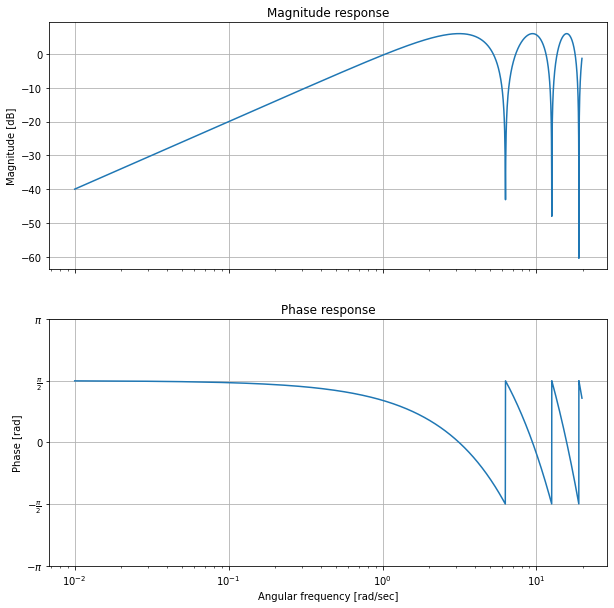

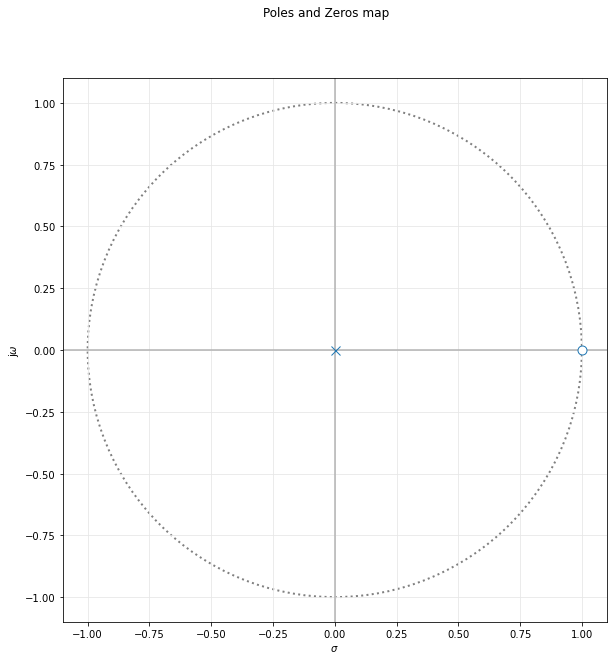

In [22]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, -1]
den_z = [1, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

Para calcular la frecuencia hasta la cual se puede considerar ideal:
$$ H(j\Omega)=\Omega=2\sin{(\frac{\Omega}{2})} $$
$$ \Omega=2\sin{(\frac{\Omega}{2})}=e $$
$$ \Omega=2\sin{(\frac{\Omega}{2})}=\Omega.0,05 $$
$$ 0,95\Omega=2\sin{(\frac{\Omega}{2})}=0 $$
$$ \Omega_{max}=1,104 $$

$$ w=k\tan{\frac{\Omega}{2}} $$
$$ 2\pi f_{d}=2f_s\tan{\frac{1,104}{2}} $$
$$ f_d=\frac{f_s.0,606}{\pi} $$

##### Transferencia del segundo sistema

$$ H(z)=1-z^{-2}=\frac{z^2-1}{z^2} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

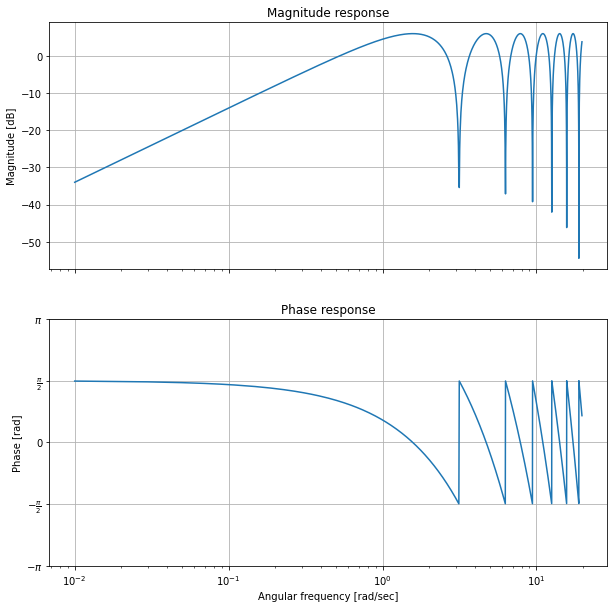

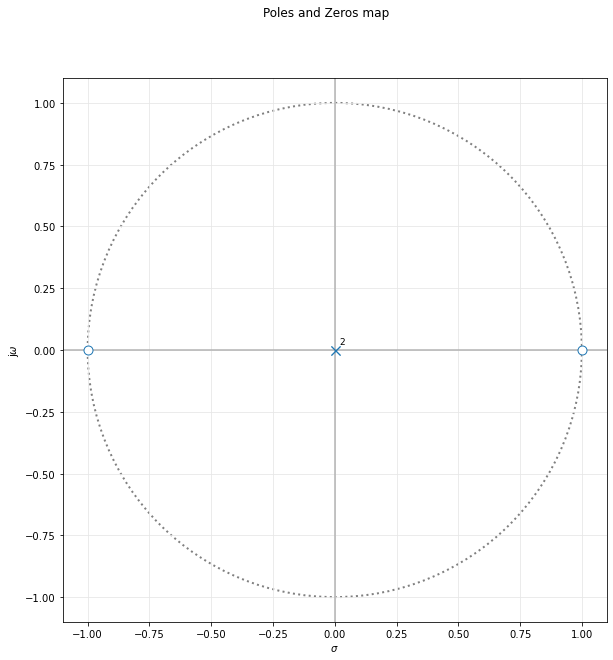

In [23]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 0, -1]
den_z = [1, 0, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

El primer sistema introduce una demora igual al período de muestreo. El segundo sistema introduce una demora de 2 veces el período de muestreo.
Para calcular la frecuencia hasta la cual se puede considerar ideal:
$$ \Omega=2\sin{(\frac{\Omega}{2})}=e $$
$$ \Omega=2\sin{(\frac{\Omega}{2})}=\Omega.0,05 $$
$$ \Omega_{max}=1,95 $$

$$ w=k\tan{\frac{\Omega}{2}} $$
$$ 2\pi f_{d}=2f_s\tan{\frac{1,95}{2}} $$
$$ f_d=\frac{f_s.1,47}{\pi} $$

### Ejercicio 4

<div>
<img src="img/diagrama.PNG" alt="Drawing" style="width: 600px;"/>
</div>

$$ f(n) = x(n).\left[1-c_1z^{-N}\right] $$

$$ g(n) = f(n)+g(n)a_0a_1z^{-1}+g(n)a_0a_2z^{-2} $$

$$ g(n) = \frac{f(n)}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ h(n) = g(n)a_0 $$

$$ h(n) = \frac{a_0x(n).\left[1-c_1z^{-N}\right]}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ y(n) = h(n)\left[b_0+z^{-1}b_1+z^{-2}b_2\right] $$

$$ y(n) = x(n)\frac{a_0.\left[1-c_1z^{-N}\right]\left[b_0+z^{-1}b_1+z^{-2}b_2\right]}{1-a_0a_1z^{-1}-a_oa_2z^{-2}} $$

$$ y(n) = x(n)\left[1-c_1z^{-N}\right]\frac{\left[b_0+z^{-1}b_1+z^{-2}b_2\right]}{\frac{1}{a_0}-a_1z^{-1}-a_2z^{-2}} $$

#### Filtro de media móvil

1. Es un filtro IIR potque no depende únicamente de la entrada, también tiene dependencia de las salidas anteriores.
2. Una gran ventaja del filtro es que puede ser implementado con un algoritmo que es muy rápido. Después de calcular la primer salida, todas las otras salidas se pueden calcular con sólo una sola suma y resta por punto. Esto se puede expresar en la ecuación:

$$ y[i]=y[i-1]+x[i+p]-x[i-p] $$

Siendo: $ p=\frac{M-1}{2} $ y $ q=p+1 $

3. No, porque esta estructura únicamente permite filtros de orden 2

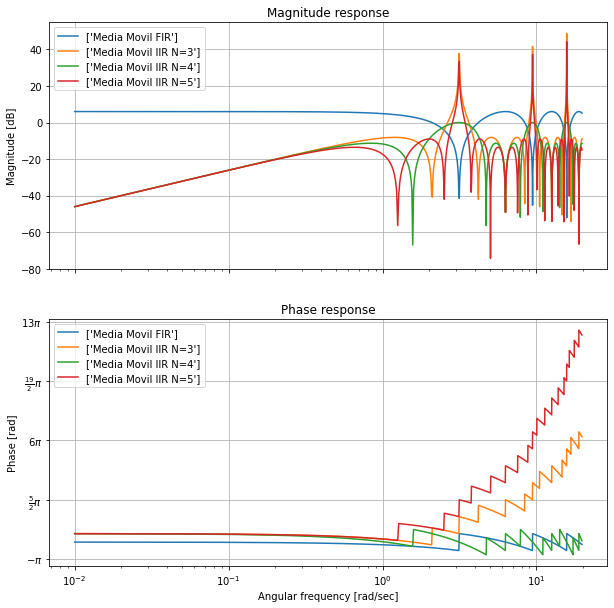

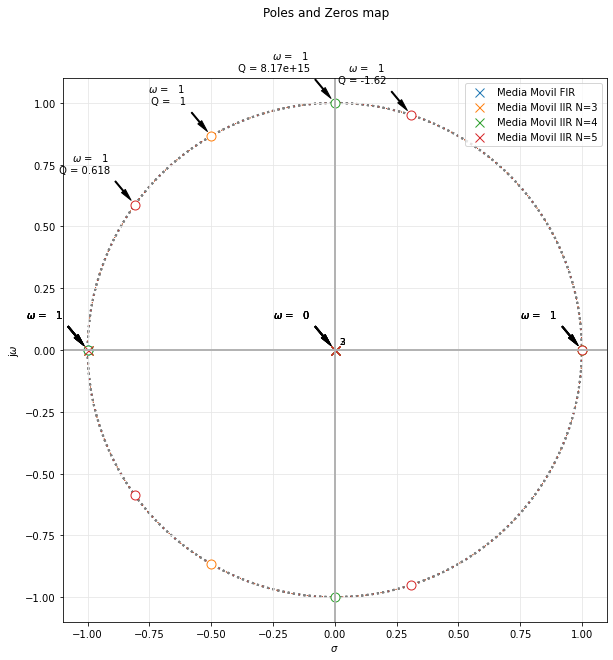

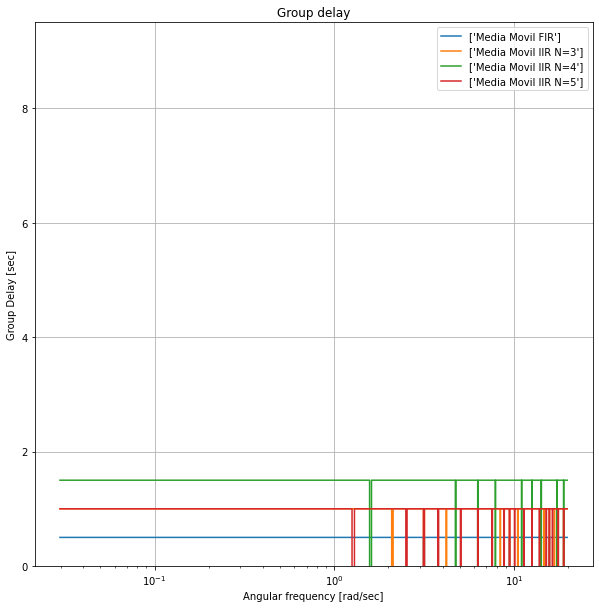

In [5]:
import scipy.signal as sig
import splane as s
import matplotlib as m
import matplotlib.pyplot as plt

m.rcParams['figure.figsize'] = (10,10)

fs=1

num_z = [1, 1]
den_z = [1, 0]

med_mov_fir = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/3, 0, 0, -1/3]
den_z = [1, 1, 0, 0]

med_mov_iir_3 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/4, 0, 0, 0, -1/4]
den_z = [1, 1, 0, 0, 0]

med_mov_iir_4 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1/5, 0, 0, 0, 0, -1/5]
den_z = [1, 1, 0, 0, 0]

med_mov_iir_5 = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.analyze_sys([med_mov_fir, med_mov_iir_3, med_mov_iir_4, med_mov_iir_5], 
              ["Media Movil FIR", "Media Movil IIR N=3", "Media Movil IIR N=4", "Media Movil IIR N=5"])

#### Filtro diferenciador

Para un diferenciador de primer orden, los coeficientes deberían tener los siguientes valores:

$$ h_1(k)=(1, −1) $$

Para un diferenciador de segundo orden, los coeficientes deberían tener los siguientes valores:

$$ h_2(k)=(1, 0, −1) $$

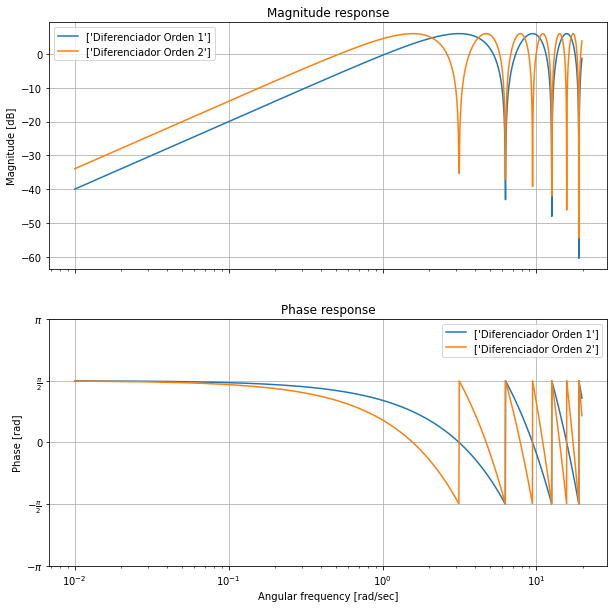

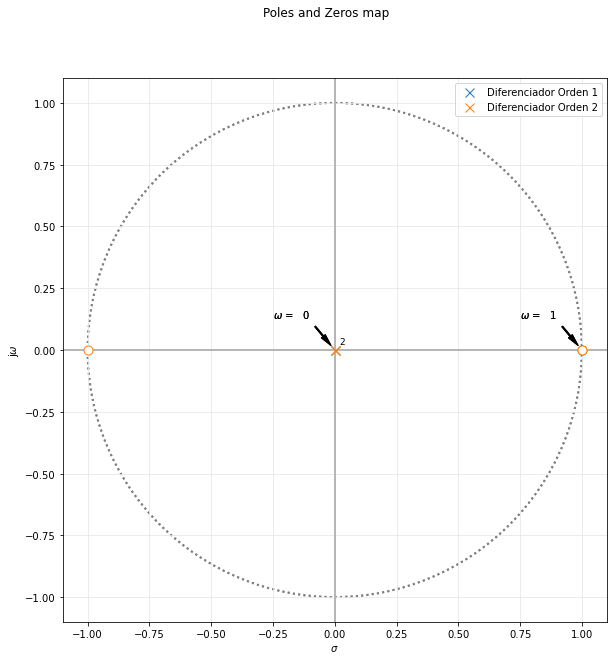

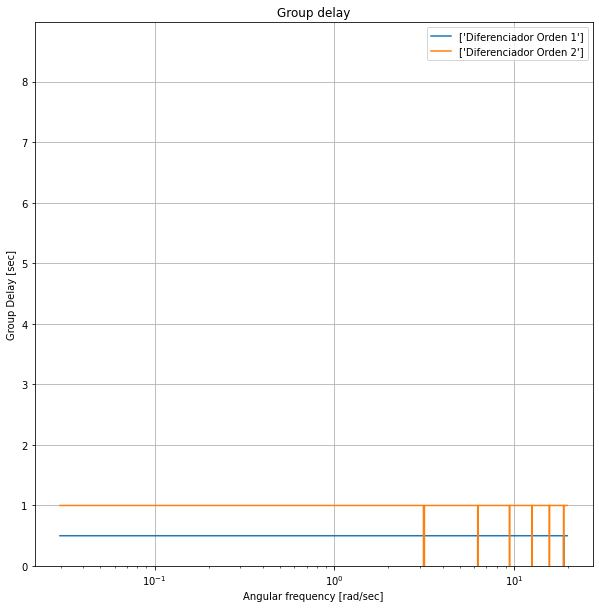

In [6]:
fs=1

num_z = [1, -1]
den_z = [1, 0]

dif_1 = sig.TransferFunction(num_z, den_z, dt=1/fs)

num_z = [1, 0, -1]
den_z = [1, 0, 0]

dif_2 = sig.TransferFunction(num_z, den_z, dt=1/fs)



s.analyze_sys([dif_1, dif_2], 
              ["Diferenciador Orden 1", "Diferenciador Orden 2"])

#### Integrador con pérdidas

$$ H(z)=\frac{1-z^{-1}}{1-(1-\alpha)z^{-1}} $$

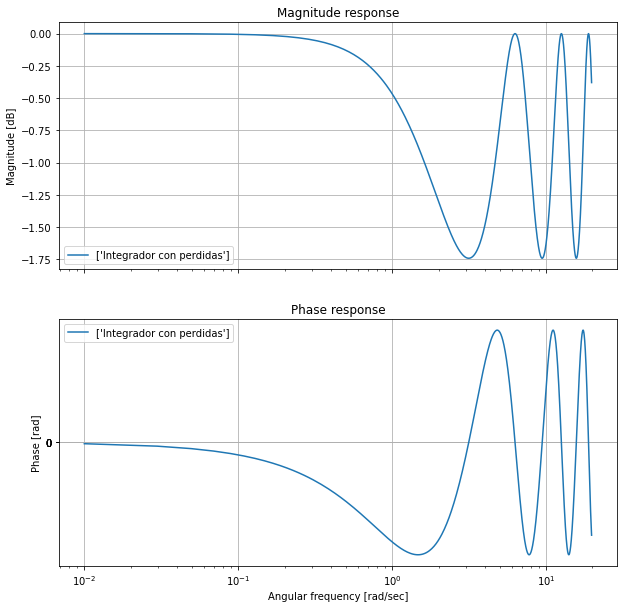

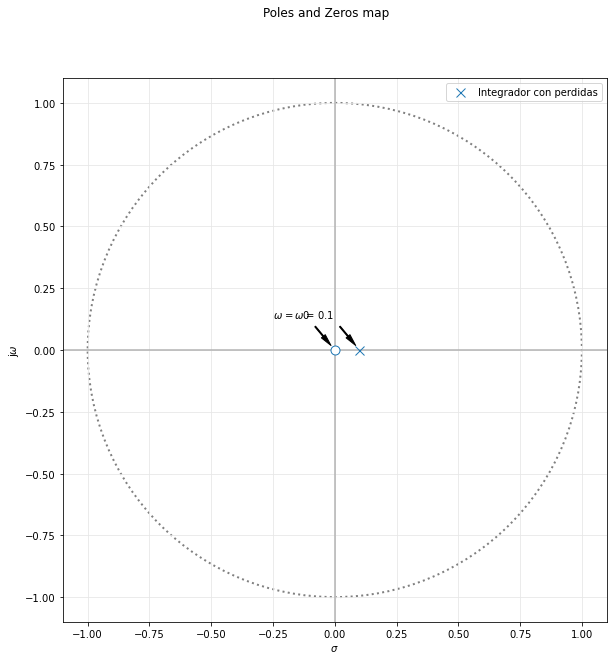

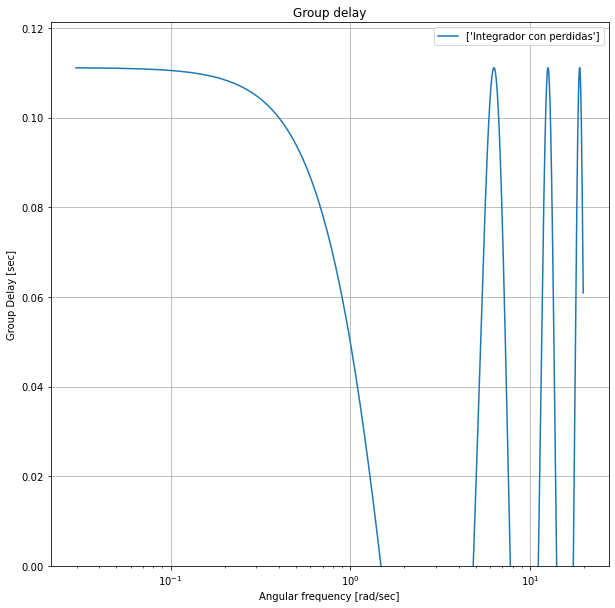

In [7]:
fs=1

num_z = [0.9, 0]
den_z = [1, -0.1]

integrador = sig.TransferFunction(num_z, den_z, dt=1/fs)


s.analyze_sys([integrador], 
              ["Integrador con perdidas"])

#### Filtro Elimina Continua

$$ H(z)=\frac{1-z^{-1}}{1-\alpha z^{-1}} $$

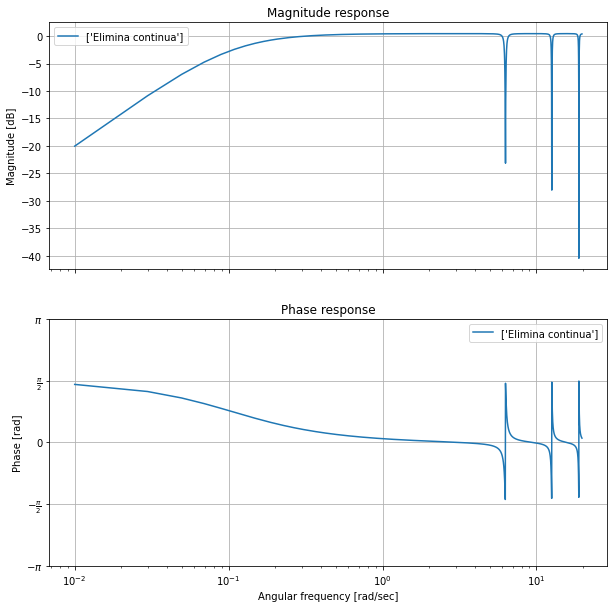

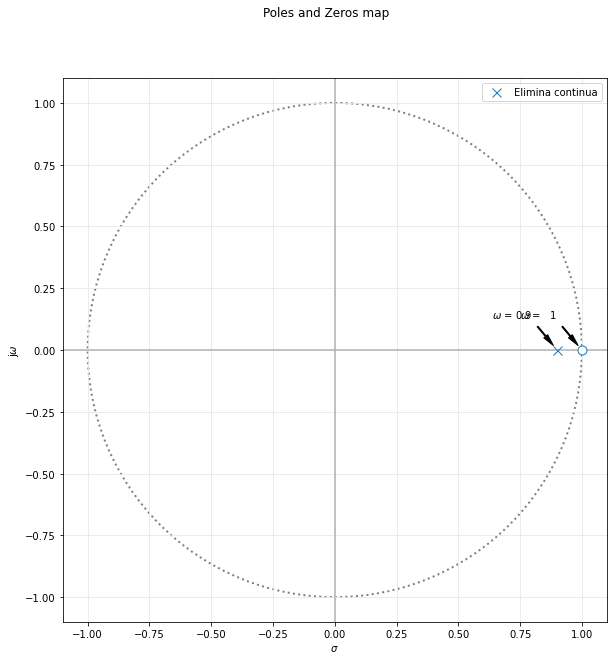

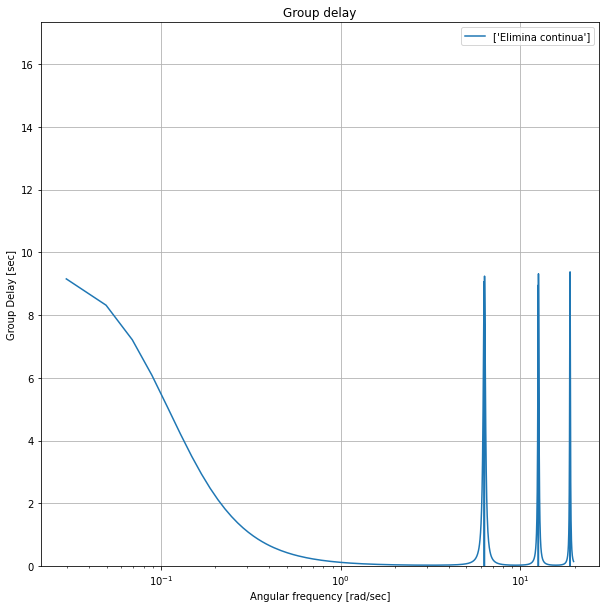

In [9]:
fs=1

num_z = [1, -1]
den_z = [1, -0.9]

dc_rm = sig.TransferFunction(num_z, den_z, dt=1/fs)


s.analyze_sys([dc_rm],
              ["Elimina continua"])

Determinar $\alpha$ para que la transferencia en $\Omega=\frac{\pi}{10}$· sea 3dB menor a la transferencia  en $\Omega=\pi$

$$ H(z)=\frac{1-z^{-1}}{1-\alpha z^{-1}} $$

$$ H(jw)=\frac{1-e^{-jw}}{1-\alpha e^{-jw}}=\frac{1-\left[cos(-w)+j sen(-w)\right]}{1-\alpha\left[cos(-w)+j sen(-w)\right]} $$

Aplicando módulo y reemplazando por los valores correspondientes se llega a:

$$ \frac{2}{1+\alpha}\frac{1}{\sqrt{2}}=\frac{0,313}{\sqrt{1-1,9\alpha+0,998\alpha^2}} $$

Despejando $\alpha$:

$$0,9491\alpha^2-1,9979\alpha+0,9511=0$$

Se obtienen 2 soluciones:
$$\alpha=0,727$$
$$\alpha=1,3776$$

Se usa $\alpha=0,727$. Simulando en el software pyfda se obtuvieron los siguientes resultados:

<div>
<img src="img/pyfda_1.PNG" alt="Drawing" style="width: 600px;"/>
</div>

<div>
<img src="img/pyfda_2.PNG" alt="Drawing" style="width: 600px;"/>
</div>

#### Filtro ecualizador de fase de 1º orden. 

$$ H(z)=\frac{1+Rz^{-1}}{1-\alpha z^{-1}} $$

Omega Limite = F_nyq * 0.11522893700185502 con D = -0.5
Sin Omega Limite con D = 0
Omega Limite = F_nyq * 0.09121911454327992 con D = 0.5


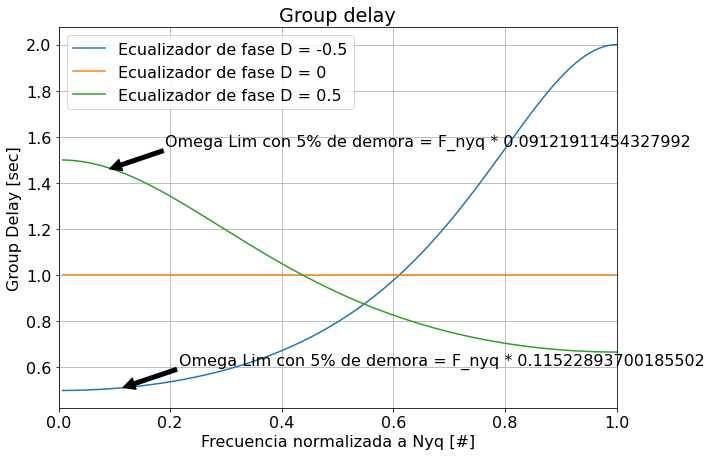

In [10]:
# Inicialización e importación de módulos
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import GroupDelay

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi
fig_font_size = 16
mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

npoints = 500
offset = 0.1
fs = 2 
w_nyq = 2*np.pi*fs/2
d = [-0.5, 0, 0.5]

for current_d in d:

    r = (-current_d)/(current_d+2)
    #print(r) #Para usar en pyFDA
    num_z = [r, 1]
    den_z = [1, r] #En la TF es (-a1) por eso r 
    eq_ph = sig.TransferFunction(num_z, den_z, dt=1/fs)
    #GroupDelay(eq_ph,filter_description="Ecualizador de fase D = {0}".format(current_d), digital = True, fs = fs)
    
    w, _, phase = eq_ph.bode(np.linspace(10**-2, w_nyq, npoints))
    phaseRad = phase * np.pi / 180.0
    groupDelay = -np.diff(phaseRad.reshape((npoints, 1)), axis = 0)/np.diff(w).reshape((npoints-1,1))
    groupDelay_correction = groupDelay * 2
    aux_hdl = plt.plot(w[1:] / w_nyq , groupDelay_correction, label="Ecualizador de fase D = {0}".format(current_d))# Bode phase plo
    
    margin_sup = groupDelay_correction[0][0] + groupDelay_correction[0][0] * (2.5/100)
    margin_inf = groupDelay_correction[0][0] - groupDelay_correction[0][0] * (2.5/100)
    
    for gd in range(len(groupDelay_correction)):
        if groupDelay_correction[gd][0] > margin_sup or groupDelay_correction[gd][0] < margin_inf:
            #Paso el limite del 5%
            print('Omega Limite = F_nyq * {0} con D = {1}'.format(w[gd]/w_nyq,current_d))
            plt.annotate('Omega Lim con 5% de demora = F_nyq * {0}'.format(w[gd]/w_nyq), 
                         xy=(w[gd]/w_nyq,groupDelay_correction[gd][0]), 
                         xytext=((w[gd]/w_nyq) + offset, groupDelay_correction[gd][0] + offset), 
                         arrowprops=dict(facecolor='black'))
            break
        if gd == len(groupDelay_correction)-1:
            #Nunca rompi el limite del 5%
            print('Sin Omega Limite con D = {1}'.format(w[gd]/w_nyq, current_d))
            break
        
    
        
    
plt.grid(True)
plt.gca().set_xlim([0, 1])
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Group Delay [sec]')
plt.title('Group delay')
plt.legend(loc='best')
axes_hdl = plt.gca()

# Ejercicio 5

In [9]:
from IPython.display import IFrame
IFrame("pdf/Ejercicio 5 tp5 tc2.pdf", width=900, height=500)

# Ejercicio 6

Considerando la siguiente ecuación en diferencias de un sistema discreto:
 
$y[n] =2.y[n−1]−1,81.y[n−2]+0,68.y[n−3]+x[n]+3.x[n−1]+3.x[n−2]+x[n−3]$

Sabiendo que $y[n-1] = y[n].z^{-1}$:

$y[n] =2.y[n]z^{-1}−1,81.y[n]z^{-2}+0,68.y[n]z^{-3}+x[n]+3.x[n]z^{-1}+3.x[n]z^{-2}+x[n]z^{-3}$

$y[n]-2.y[n]z^{-1}+1,81.y[n]z^{-2}-0,68.y[n]z^{-3} = x[n]+3.x[n]z^{-1}+3.x[n]z^{-2}+x[n]z^{-3}$

$y[n] (1-2z^{-1}+1,81z^{-2}-0,68z^{-3}) = x[n](1+3z^{-1}+3z^{-2}+z^{-3})$

$H[z] = \frac{y[n]}{x[n]} = \frac{1+3z^{-1}+3z^{-2}+z^{-3}}{1-2z^{-1}+1,81z^{-2}-0,68z^{-3}}$

Si ahora se reempla $z=e^{j\Omega}$ se obtendra modulo y fase:

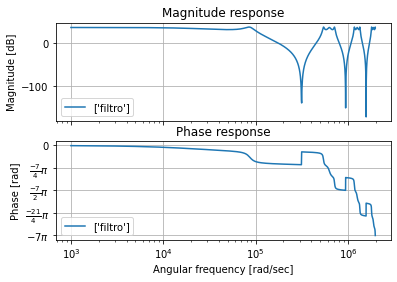

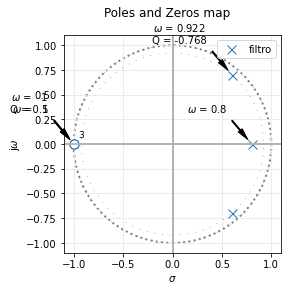

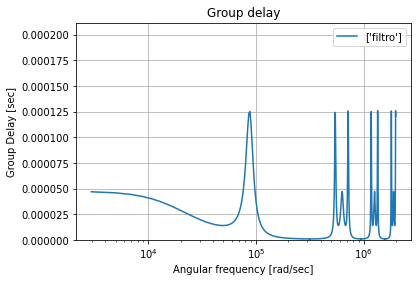

In [7]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from splane import analyze_sys

fs = 100000#Hz

a = np.array([1,-2,1.81,-0.68])#denominador
b = np.array([1,3,3,1])#numerador

my_tf = sig.TransferFunction(b,a,dt = 1/fs)
analyze_sys(my_tf,'filtro')

Si ahora a a la entrada tenemos:

$x(t)=10+5.cos(2\pi2000t−60º)+20.sen(2\pi 8000t+30º)$

Text(0, 0.5, 'y')

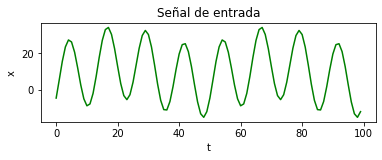

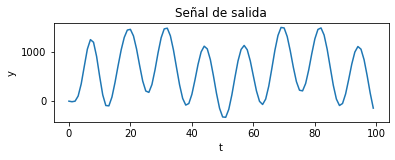

In [8]:
Ts = 1/fs
t = 0.001#s
n = t / Ts
n = np.arange(n)
x = 10 + 5*np.sin(2*np.pi*2000*n*Ts - 60*(np.pi/180)) + 20*np.sin(2*np.pi*8000*n*Ts - 30*(np.pi/180))

y = sig.lfilter(b, a, x)

plt.figure(1)
plt.subplot(211)
plt.title("Señal de entrada")
plt.plot(n, x, color='green') 
plt.xlabel('t') 
plt.ylabel('x') 

plt.figure(2)
plt.subplot(212)
plt.title("Señal de salida")
plt.plot(n, y)
plt.xlabel('t') 
plt.ylabel('y') 

# Ejercicio 7

![imagen](img/7.1.jpg)

Mirando la imagen podemos decir que:

$$a_0x(n)+a_1x(n-1)+a_2x(n-2)=y(n)+b_1y(n-1)+b_2y(n-2)$$

$$H(Z) = \frac{a_0+a_1Z^{-1}+a_2Z^{-2}}{1+b_1Z^{-1}+b_2Z^{-2}}$$

**Esto es un filtro del tipo iir**

![imagen](img/7.2.jpg)

Para esto vamos a calcular una señal auxiliar para simplificar el álgebra.

$$o(n) = x(n) - b_1o(n-1) - b_2o(n-2)$$

$$O(Z) = X(Z) - b_1O(Z)Z^{-1} - b_2O(Z)Z^{-2}$$

$$O(Z) = X(Z)\frac{1}{1+ b_1Z^{-1} + b_2Z^{-2}}$$

$$y(n) = a_0o(n) + a_1o(n-1) + a_2o(n-2)$$

$$Y(Z) = a_0O(Z) + a_1O(Z)Z^{-1} + a_2O(Z)Z^{-2}$$

$$Y(Z) = O(Z)(a_0 + a_1Z^{-1} + a_2Z^{-2})$$

$$H(Z) = \frac{a_0+a_1Z^{-1}+a_2Z^{-2}}{1+b_1Z^{-1}+b_2Z^{-2}}$$

**Esto es un filtro del tipo iir**


![image.png](img/7.3.jpg)

$$Y\left(Z\right)=a_0X\left(Z\right)+O_1\left(Z\right)Z^{-1}$$

$$O_1\left(Z\right)=a_1X\left(Z\right)-b_1Y\left(Z\right)+O_2\left(Z\right)Z^{-1}$$

$$O_2\left(Z\right)=a_2X\left(Z\right)-b_2Y\left(Z\right)$$

$$O_1\left(Z\right)=a_1X\left(Z\right)-b_1Y\left(Z\right)+\left(a_2X\left(Z\right)-b_2Y\left(Z\right)\right)Z^{-1}$$

$$\therefore Y\left(Z\right)=a_0X\left(Z\right)+\left(a_1X\left(Z\right)-b_1Y\left(Z\right)+\left(a_2X\left(Z\right)-b_2Y\left(Z\right)\right)Z^{-1}\right)Z^{-1}$$

$$Y\left(Z\right)=a_0X\left(Z\right)+a_1X\left(Z\right)Z^{-1}-b_1Y\left(Z\right)Z^{-1}+a_2X\left(Z\right)Z^{-2}-b_2Y\left(Z\right)Z^{-2}$$

$$H\left(Z\right)=\frac{a_0+a_1Z^{=1}+a_2Z^{-2}}{1+b_1Z^{=1}+b_2Z^{-2}}$$

**Son todos filtros IIR, y son todos iguales. Sólo cambia su forma de representación, las características del filtro no cambian.**